# Jupyter notebook ako pomocník numerickej matematiky alebo ako zostrojiť svorku pomocou elementárnych funkcií

Tento notebook bol vytvorený za účelom propagácie použitia prostredia Jupyter notebook vo výučovacom procese na slovenských školách. Skoršie verzie boli prezentované na "Konferencii slovenských matetamtikov" r. 2018 v Jasnej pod Chopkom a na konferencii pre stredoškolákov "Trojsten" konanej r. 2019 na Fakulte matematiky, fyziky a informatiky, Univerzity Komenského v Bratislave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")
%matplotlib inline

Naším cieľom bude vykresliť nasledujúci obrázok.
<img src="files/sinus.png">
Tento obrázok obsahuje grafy <b>dvoch</b> funkcií. Jedna je sínus. Ktorá je tá druhá (a náročnejšia)?

## Logistická funkcia

Logistická fukcia je definovaná pomocou
$$
h(\theta) = \frac{1}{1 + \mathrm{e}^{-\theta}}
$$

In [2]:
def h(theta):
	return 1./(1. + np.exp(-theta))

Logistická funkcia je rastúca funckia definovaná pre všetky reálne $\theta$. Konverguje k nule pre $\theta\to-\infty$, k jednotke pre $\theta\to\infty$, a v bode $\theta=0$ nadobúda hodnotu $0.5$.

In [3]:
h(0)

0.5

In [4]:
h(-5)

0.0066928509242848554

In [5]:
h(5)

0.9933071490757153

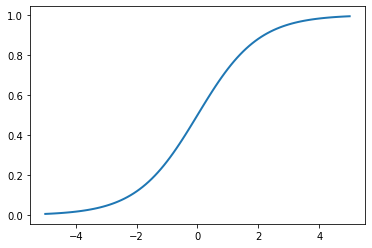

In [6]:
fig, ax = plt.subplots(1,1)
theta = np.linspace(-5,5,101)
ax.plot(theta,h(theta), color=cmap(0), lw=2)

## Schodíková funkcia

Pomocou logistickej funkcie si definujeme ``schodíkovú'' funkciu
$$
S(z) = h\left(\frac{z}{\varepsilon}\right) + 
       h\left(\frac{z-0.5}{\varepsilon}\right) +
       h\left(\frac{z-1}{\varepsilon}\right) - 0.5,
$$
kde $\varepsilon\ll 1$ je malé číslo.

In [7]:
def schodiky(x, eps=0.02):
	return h(x/eps) + h((x-0.5)/eps) + h((x-1.)/eps) - 0.5

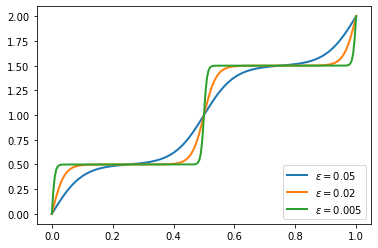

In [8]:
fig, ax = plt.subplots(1,1)
z = np.linspace(0,1,201)
l1, = ax.plot(z, schodiky(z,0.05), color=cmap(0),lw=2)
l2, = ax.plot(z, schodiky(z,0.02), color=cmap(1),lw=2)
l3, = ax.plot(z, schodiky(z,0.005), color=cmap(2),lw=2)
ax.legend((l1,l2,l3),("$\\varepsilon=0.05$",
                      "$\\varepsilon=0.02$",
                      "$\\varepsilon=0.005$"), loc=4)

## Funkcia Strieška

Aby sme získali zo schodíkov striešku, potrebujeme ich preklopiť cez vodorovnú priamku $y=1$. Toto vieme urobiť pomocou funkcie  
$$
y = 1 - | x - 1|,
$$
ktorú  budeme nazývať ``strieška''.

In [9]:
def strieska(x):
	return 1 - np.abs(x - 1.)

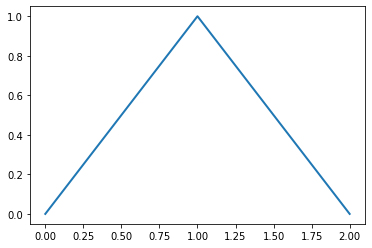

In [10]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0,2,101)
ax.plot(x,strieska(x), color=cmap(0), lw=2, ls='-')

## Svorka na jednotkovom intervale

In [11]:
def svorka01(x,eps=0.02):
    return strieska(schodiky(x, eps))

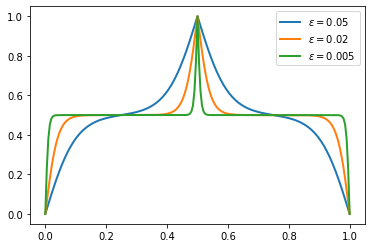

In [12]:
fig, ax = plt.subplots(1,1)
z = np.linspace(0,1,201)
l1, = ax.plot(z, svorka01(z,0.05), color=cmap(0),lw=2)
l2, = ax.plot(z, svorka01(z,0.02), color=cmap(1),lw=2)
l3, = ax.plot(z, svorka01(z,0.005), color=cmap(2),lw=2)
ax.legend((l1,l2,l3), ("$\\varepsilon=0.05$",
                       "$\\varepsilon=0.02$", 
                       "$\\varepsilon=0.005$"), loc=1)

## Svorka a jej aplikácia

In [13]:
def svorka(x, eps=0.02, top=0., bottom=1.0):
	return bottom + (top-bottom)*svorka01((x-x[0])/(x[-1]-x[0]),eps)

Text(0, 0.5, '$\\sin(x)$')

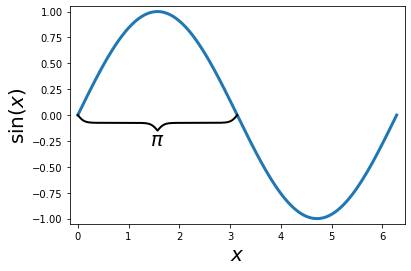

In [14]:
fig, ax = plt.subplots(1,1)
x = np.linspace(0,2.*np.pi,201)
ax.plot(x, np.sin(x), color=cmap(0),lw=3)
x1 = np.linspace(0, np.pi,201)
ax.plot(x1, svorka(x1,eps=0.02,top=-0.15,bottom=0), color='k', lw=2)
ax.text(np.pi/2,-0.15,"$\\pi$",va='top',ha='center', fontsize=20)
ax.set_xlim(-0.025*2*np.pi,1.025*2*np.pi)
ax.set_ylim(-1.05, 1.05)
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$\\sin(x)$", fontsize=20)

# Ďakujem za pozornosť!